# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Data Preprocessing and Data Exploration

In [2]:
data = pd.read_csv('training_set.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-11-03,553.979065,556.372498,551.715271,553.699829,553.699829,1382200
1,2014-11-04,551.485901,553.979065,547.796021,552.592834,552.592834,1244200
2,2014-11-05,555.275513,555.275513,542.560425,544.425293,544.425293,2032200
3,2014-11-06,544.006409,545.387634,539.488831,540.555908,540.555908,1333200
4,2014-11-07,544.714478,544.714478,537.195129,539.528748,539.528748,1633700


### Get feature 'open' column

In [4]:
train_data = data.iloc[:,1:2]

In [5]:
train_data

,Open
0,553.979065
1,551.485901
2,555.275513
3,544.006409
4,544.714478
...,...
1252,1260.900024
1253,1251.030029
1254,1275.449951
1255,1276.229980


In [6]:
train_data.shape

(1257, 1)

In [7]:
train_data.describe()

,Open
count,1257.000000
mean,887.297504
std,227.473214
min,493.295654
25%,715.989990
50%,905.099976
75%,1094.000000
max,1276.229980


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
dtypes: float64(1)
memory usage: 9.9 KB


### Check for NULL values

In [9]:
train_data.isnull().any()

Open    False
dtype: bool

In [10]:
train_data = train_data.values

Text(0, 0.5, 'Stock Price')

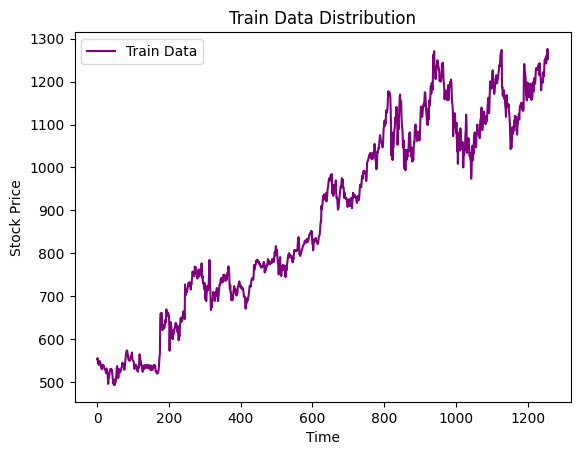

In [11]:
plt.plot(train_data,color='purple',label="Train Data")
plt.title("Train Data Distribution")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Stock Price")

# Feature Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler(feature_range=(0,1))
train_data_scaled = ss.fit_transform(train_data)

Text(0, 0.5, 'Stock Price')

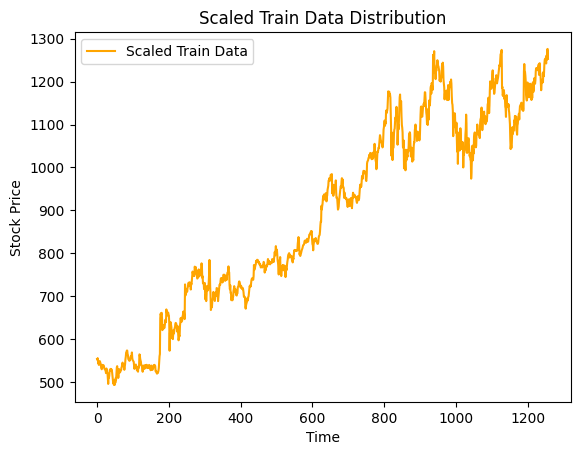

In [13]:
plt.plot(train_data,color='orange',label="Scaled Train Data")
plt.title("Scaled Train Data Distribution")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Stock Price")

# Train-Test Data

In [14]:
x_train = []
y_train = []

for i in range(60,train_data.shape[0]):
    x_train.append(train_data_scaled[i-60:i,0])
    y_train.append(train_data_scaled[i,0])

In [15]:
x_train

[array([0.07750766, 0.07432328, 0.07916355, 0.06477013, 0.0656745 ,
        0.05962419, 0.06857863, 0.07099881, 0.0702473 , 0.06627321,
        0.06232454, 0.05458014, 0.05139576, 0.04661926, 0.05981526,
        0.05477121, 0.05649079, 0.05888547, 0.05855423, 0.05636341,
        0.04949789, 0.04686124, 0.04650458, 0.0463008 , 0.04137135,
        0.03501537, 0.04895017, 0.04222483, 0.03676043, 0.03577966,
        0.02153911, 0.00299331, 0.02330963, 0.02147542, 0.02729646,
        0.04120577, 0.04567668, 0.04346037, 0.04781652, 0.04259419,
        0.04661926, 0.04376603, 0.03644198, 0.02592084, 0.01573081,
        0.00425434, 0.01287763, 0.0003694 , 0.00533701, 0.        ,
        0.01390935, 0.00682731, 0.0208258 , 0.01604923, 0.03417468,
        0.05214726, 0.05589216, 0.04498879, 0.03583056, 0.0208258 ]),
 array([0.07432328, 0.07916355, 0.06477013, 0.0656745 , 0.05962419,
        0.06857863, 0.07099881, 0.0702473 , 0.06627321, 0.06232454,
        0.05458014, 0.05139576, 0.04661926, 0.

In [16]:
y_train

[0.0270162085089114,
 0.0472305961969024,
 0.04247951059946242,
 0.044058996846179976,
 0.03711708764701671,
 0.04202096894650653,
 0.04247951059946242,
 0.04413539405858158,
 0.051777902250258356,
 0.05426168784430074,
 0.062031577090413514,
 0.06646420813589404,
 0.05954779149637124,
 0.055267954875694025,
 0.06175139905668159,
 0.05273318543961747,
 0.04502706527137246,
 0.05254219113136693,
 0.06185328882872354,
 0.07590268688768664,
 0.08391463219611095,
 0.09655020413551252,
 0.09835895993146171,
 0.10237124793018715,
 0.10219288175647057,
 0.09197740552251621,
 0.08865293255771733,
 0.0770491214865957,
 0.07497289498072146,
 0.07496010974488809,
 0.07171211190451743,
 0.07268010369492972,
 0.07368637200356953,
 0.0824625282810757,
 0.08534116691672544,
 0.08378725114167496,
 0.08650030756219518,
 0.09661389402410747,
 0.08016981490731057,
 0.07432327983024212,
 0.0725655065990809,
 0.07050198741701363,
 0.06871879953823867,
 0.058847192503857615,
 0.04785479669976811,
 0.0553189

In [17]:
x_train = np.array(x_train)

In [18]:
y_train = np.array(y_train)

In [19]:
x_train = x_train.reshape(train_data.shape[0]-60,60,1)    # (1257-60,60,1)

# Model  Building

In [20]:
model = tf.keras.models.Sequential()

In [21]:
# Input Layer
model.add(tf.keras.layers.LSTM(units=60,activation='relu',return_sequences=True,input_shape=(60,1)))
model.add(tf.keras.layers.Dropout(0.3))

# Hidden Layer
model.add(tf.keras.layers.LSTM(units=60,activation='relu',return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=80,activation='relu',return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=150,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

# Output Layer
model.add(tf.keras.layers.Dense(units=1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 150)               1

### Model Compiling

In [23]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [24]:
model.fit(x_train,y_train,batch_size=10,epochs=50)

Epoch 1/50
120/120 [==============================] - 7s 47ms/step - loss: 0.0388
Epoch 2/50
120/120 [==============================] - 6s 50ms/step - loss: 0.0056
Epoch 3/50
120/120 [==============================] - 6s 50ms/step - loss: 0.0051
Epoch 4/50
120/120 [==============================] - 6s 50ms/step - loss: 0.0051
Epoch 5/50
120/120 [==============================] - 6s 50ms/step - loss: 0.0044
Epoch 6/50
120/120 [==============================] - 6s 50ms/step - loss: 0.0047
Epoch 7/50
120/120 [==============================] - 6s 50ms/step - loss: 0.0047
Epoch 8/50
120/120 [==============================] - 6s 50ms/step - loss: 0.0041
Epoch 9/50
120/120 [==============================] - 6s 50ms/step - loss: 0.0039
Epoch 10/50
120/120 [==============================] - 6s 50ms/step - loss: 0.0036
Epoch 11/50
120/120 [==============================] - 6s 50ms/step - loss: 0.0044
Epoch 12/50
120/120 [==============================] - 6s 50ms/step - loss: 0.0038
Epoch 13/50
1

## Testing Data

In [25]:
data1 = pd.read_csv('test_set.csv')

In [26]:
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-01,1265.000000,1274.619995,1260.500000,1273.739990,1273.739990,1670100
1,2019-11-04,1276.449951,1294.130005,1276.354980,1291.369995,1291.369995,1501000
2,2019-11-05,1292.890015,1298.930054,1291.229004,1292.030029,1292.030029,1282700
3,2019-11-06,1289.459961,1293.729980,1282.500000,1291.800049,1291.800049,1152700
4,2019-11-07,1294.280029,1323.739990,1294.244995,1308.859985,1308.859985,2030000


### Get 'open' column

In [27]:
test_data = data1.iloc[:,1:2]

In [28]:
test_data.head()

,Open
0,1265.000000
1,1276.449951
2,1292.890015
3,1289.459961
4,1294.280029


In [29]:
test_data.shape

(20, 1)

In [30]:
test_data.describe()

,Open
count,20.000000
mean,1302.348492
std,15.648086
min,1265.000000
25%,1294.227508
50%,1302.330017
75%,1310.329986
max,1332.219971


In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 292.0 bytes


In [32]:
test_data = test_data.values

### Getting Total Dataset

In [33]:
combined_dataset = pd.concat((data['Open'],data1['Open']),axis=0)

In [34]:
combined_dataset

0      553.979065
1      551.485901
2      555.275513
3      544.006409
4      544.714478
         ...     
15    1305.619995
16    1299.180054
17    1309.859985
18    1315.000000
19    1307.119995
Name: Open, Length: 1277, dtype: float64

In [36]:
val = combined_dataset[len(combined_dataset)-len(data1)-60:].values

In [37]:
val

array([1156.      , 1182.829956, 1197.98999 , 1179.209961, 1171.459961,
       1176.310059, 1163.5     , 1179.550049, 1190.089966, 1195.25    ,
       1193.150024, 1194.069946, 1181.98999 , 1157.26001 , 1180.530029,
       1161.709961, 1181.119995, 1198.5     , 1177.030029, 1176.709961,
       1191.530029, 1208.130005, 1204.      , 1195.150024, 1203.410034,
       1224.300049, 1231.349976, 1229.52002 , 1230.400024, 1227.51001 ,
       1232.060059, 1233.119995, 1226.      , 1240.      , 1215.819946,
       1241.959961, 1243.01001 , 1220.969971, 1219.      , 1196.97998 ,
       1180.      , 1191.890015, 1204.400024, 1197.589966, 1199.349976,
       1198.579956, 1222.209961, 1212.339966, 1220.400024, 1241.170044,
       1250.930054, 1253.459961, 1252.26001 , 1247.849976, 1242.359985,
       1260.900024, 1251.030029, 1275.449951, 1276.22998 , 1252.969971,
       1265.      , 1276.449951, 1292.890015, 1289.459961, 1294.280029,
       1305.280029, 1303.180054, 1300.      , 1294.069946, 1297.

In [38]:
val = val.reshape(-1,1)

In [39]:
val

array([[1156.      ],
       [1182.829956],
       [1197.98999 ],
       [1179.209961],
       [1171.459961],
       [1176.310059],
       [1163.5     ],
       [1179.550049],
       [1190.089966],
       [1195.25    ],
       [1193.150024],
       [1194.069946],
       [1181.98999 ],
       [1157.26001 ],
       [1180.530029],
       [1161.709961],
       [1181.119995],
       [1198.5     ],
       [1177.030029],
       [1176.709961],
       [1191.530029],
       [1208.130005],
       [1204.      ],
       [1195.150024],
       [1203.410034],
       [1224.300049],
       [1231.349976],
       [1229.52002 ],
       [1230.400024],
       [1227.51001 ],
       [1232.060059],
       [1233.119995],
       [1226.      ],
       [1240.      ],
       [1215.819946],
       [1241.959961],
       [1243.01001 ],
       [1220.969971],
       [1219.      ],
       [1196.97998 ],
       [1180.      ],
       [1191.890015],
       [1204.400024],
       [1197.589966],
       [1199.349976],
       [11

In [40]:
val = ss.transform(val)

### Test set

In [41]:
x_test = []
for i in range(60,80):
    x_test.append(val[i-60:i,0])

x_test = np.array(x_test)

In [42]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [43]:
predicted_test_data=model.predict(x_test)
predicted_test_data=ss.inverse_transform(predicted_test_data)

1/1 [==============================] - 0s 214ms/step


### Validation and Results

In [44]:
predicted_test_data[5],test_data[5]

(array([1238.1831], dtype=float32), array([1305.280029]))

In [45]:
predicted_test_data,test_data

(array([[1226.284 ],
        [1226.8474],
        [1227.9242],
        [1230.9829],
        [1234.667 ],
        [1238.1831],
        [1241.7307],
        [1244.4962],
        [1245.9401],
        [1245.7986],
        [1245.1665],
        [1246.4733],
        [1250.2355],
        [1254.3246],
        [1255.9609],
        [1254.4908],
        [1252.0319],
        [1249.4753],
        [1248.5392],
        [1249.494 ]], dtype=float32),
 array([[1265.      ],
        [1276.449951],
        [1292.890015],
        [1289.459961],
        [1294.280029],
        [1305.280029],
        [1303.180054],
        [1300.      ],
        [1294.069946],
        [1297.5     ],
        [1318.939941],
        [1332.219971],
        [1327.699951],
        [1311.73999 ],
        [1301.47998 ],
        [1305.619995],
        [1299.180054],
        [1309.859985],
        [1315.      ],
        [1307.119995]]))

Text(0.5, 1.0, 'Comparison of Predicted v/s Original Result')

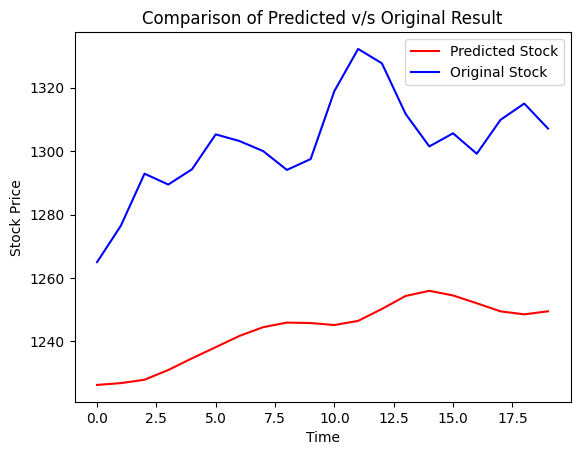

In [46]:
plt.plot(predicted_test_data,color='red',label='Predicted Stock')
plt.plot(test_data,color='blue',label='Original Stock')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Comparison of Predicted v/s Original Result")